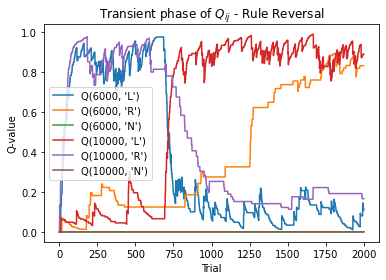

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

N=3000
T=1000
df = pd.read_csv('expert_mice_all_trials.csv')

# Slicing the data
df_sliced = df.iloc[T:N+1]   

# Reset the index of the sliced data
df_sliced.reset_index(drop=True, inplace=True)

# Extract the columns
rew_t = df_sliced['rew_t']
tone_freq = df_sliced['tone_freq']
response = df_sliced['response']



# Define your rewards for each trial
R = []

for t in range(N-T):
    R.append(rew_t[t])
A=0.07

def DeltaLearningRule(A, tone_freq, response):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0, (6000, 'R'): 0, (6000, 'N'): 0, (10000, 'L'): 0, (10000, 'R'): 0, (10000, 'N'): 0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials
N=N-T
Q_values_over_trials = DeltaLearningRule(A, tone_freq, response)

P=[]
B=8

def SoftMax(Q_values_over_trials,B):
    N=len(tone_freq)
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 
            

#print(SoftMax(Q_values_over_trials,B))

    
# Plot the Q values
for key, values in Q_values_over_trials.items():
    plt.plot(values, label=f'Q{key}')
plt.xlabel('Trial')
plt.ylabel('Q-value')
plt.legend()
plt.title('Transient phase of $Q_{ij}$ - Rule Reversal')
plt.show()



The maximum value is at: (99, 4)
The maximum value corresponds to $\alpha$ = 1.0 and $\beta$ = 0.40399999999999997


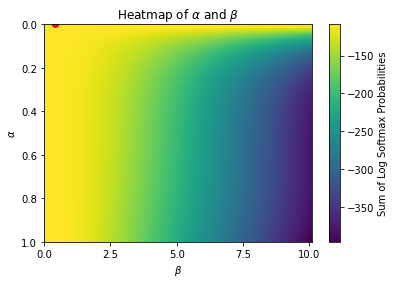

Last set of Q_ij's is {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
N=100
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[:N].astype(int)
tone_freq = df['tone_freq'].iloc[:N] 
response = df['response'].iloc[:N] 


def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = 100

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0, (6000, 'R'): 0, (6000, 'N'): 0, (10000, 'L'): 0, (10000, 'R'): 0, (10000, 'N'): 0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])
        

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials


def SoftMax(Q_values_over_trials,B, tone_freq, response, N):
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 


log_softmax_array = []
N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response, N)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

#print(log_softmax_array)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t100 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t100[key] = last_value

print("Last set of Q_ij's is",Q_at_t100)





The maximum value is at: (0, 0)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.0


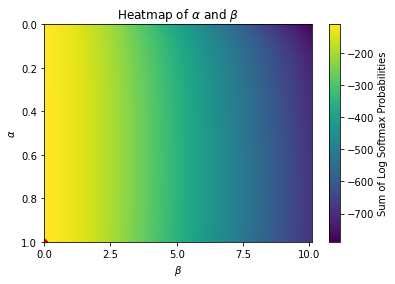

Last set of Q_ij's is {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials
 

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[100:201].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[100:201].reset_index(drop=True)
response = df['response'].iloc[100:201].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t200 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t200[key] = last_value

print("Last set of Q_ij's is",Q_at_t200)




The maximum value is at: (0, 0)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.0


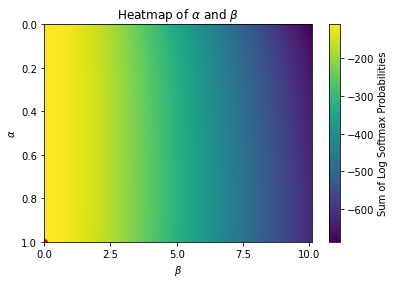

Last set of Q_ij's is {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[200:300].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[200:300].reset_index(drop=True)
response = df['response'].iloc[200:300].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t300 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t300[key] = last_value

print("Last set of Q_ij's is",Q_at_t300)


The maximum value is at: (25, 1)
The maximum value corresponds to $\alpha$ = 0.25252525252525254 and $\beta$ = 0.10099999999999999


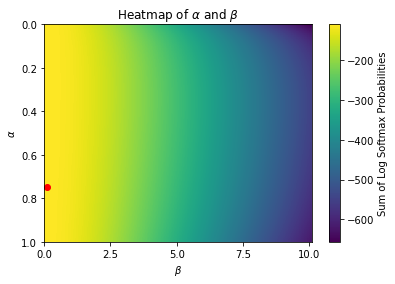

Last set of Q_ij's is {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q =  {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[300:400].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[300:400].reset_index(drop=True)
response = df['response'].iloc[300:400].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t400 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t400[key] = last_value

print("Last set of Q_ij's is",Q_at_t400)


The maximum value is at: (0, 1)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.10099999999999999


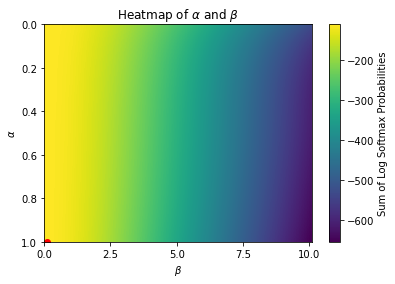

Last set of Q_ij's is {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[400:500].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[400:500].reset_index(drop=True)
response = df['response'].iloc[400:500].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t500 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t500[key] = last_value

print("Last set of Q_ij's is",Q_at_t500)


The maximum value is at: (0, 0)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.0


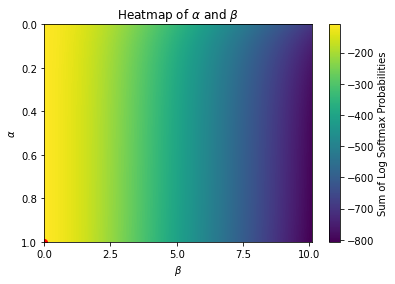

Last set of Q_ij's is {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[500:600].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[500:600].reset_index(drop=True)
response = df['response'].iloc[500:600].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t600 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t600[key] = last_value

print("Last set of Q_ij's is",Q_at_t600)


The maximum value is at: (0, 0)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.0


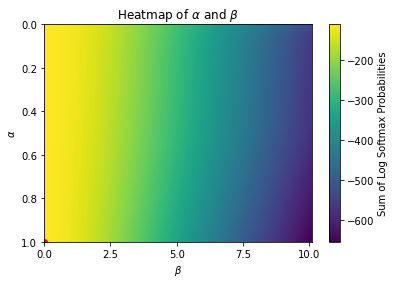

Last set of Q_ij's is {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[600:700].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[600:700].reset_index(drop=True)
response = df['response'].iloc[600:700].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t700 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t700[key] = last_value

print("Last set of Q_ij's is",Q_at_t700)


The maximum value is at: (21, 8)
The maximum value corresponds to $\alpha$ = 0.21212121212121213 and $\beta$ = 0.8079999999999999


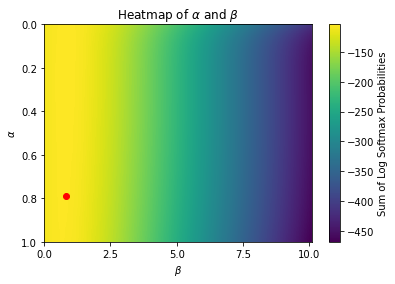

Last set of Q_ij's is {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[700:800].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[700:800].reset_index(drop=True)
response = df['response'].iloc[700:800].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t800 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t800[key] = last_value

print("Last set of Q_ij's is",Q_at_t800)



The maximum value is at: (0, 12)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 1.212


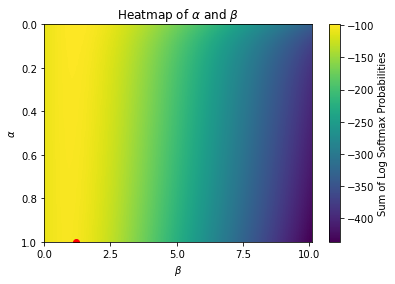

Last set of Q_ij's is {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[800:900].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[800:900].reset_index(drop=True)
response = df['response'].iloc[800:900].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t900 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t900[key] = last_value

print("Last set of Q_ij's is",Q_at_t900)


The maximum value is at: (0, 14)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 1.414


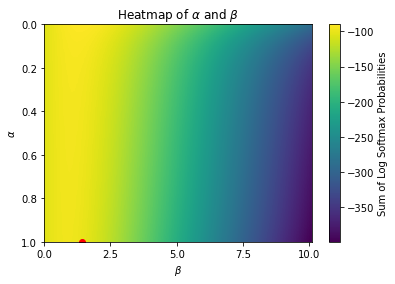

Last set of Q_ij's is {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}   
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[900:995].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[900:995].reset_index(drop=True)
response = df['response'].iloc[900:995].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(log_softmax_matrix), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t995 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t995[key] = last_value

print("Last set of Q_ij's is",Q_at_t995)